<a href="https://colab.research.google.com/github/Pushkarp26/IBM-CAPSTONE-/blob/master/Coursera_IBM_capstone-The%20Battle%20of%20Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Battle of the Neighborhoods**

##**By:Pushkar Patil**

#**Table of Contents**
1.   Introduction
2.   Exploring Alberta
3.   Exploring Toronto
4.   Methodology
5.   Analysis
6.   Results and Discussion
7.   Conclusion



#**1.0.Introduction**

#**1.1.Background**

**Toronto** is the capital city of the Canadian province of Ontario. With a recorded population of approximately 2.7 million in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Toronto covers an area of 630 square kilometres (243 sq mi), with a maximum north–south distance of 21 km (13 mi). It has a maximum east–west distance of 43 km (27 mi) and it has a 46-kilometre (29 mi) long waterfront shoreline, on the northwestern shore of Lake Ontario. Toronto encompasses a geographical area formerly administered by many separate municipalities. These municipalities have each developed a distinct history and identity over the years, and their names remain in common use among Torontonians. Former municipalities include East York, Etobicoke, Forest Hill, Mimico, North York, Parkdale, Scarborough, Swansea, Weston and York. Throughout the city there exist hundreds of small neighbourhoods and some larger neighbourhoods covering a few square kilometres.

**Alberta** is one of the thirteen provinces and territories of Canada.With an estimated population of 4,067,175 people as of the 2016 census,it is Canada's fourth most populous province and the most populous of Canada's three prairie provinces. Alberta's area is approximately 660,000 square kilometres (250,000 sq mi).Alberta was named after Princess Louise Caroline Alberta,the fourth daughter of Queen Victoria.Alberta is one of three Canadian provinces and territories to border only a single U.S. stateCalgary and Edmonton anchor Alberta's two census metropolitan areas, which each have populations exceeding one million,while the province has 16 census agglomerations. Key economic sectors in Alberta include energy and clean technology, agriculture, and petrochemicals. Key economic sectors in Alberta include energy and clean technology, agriculture, and petrochemicals.About 81% of the population lives in urban areas and only about 19% in rural areas.Alberta has been a tourist destination from the early days of the twentieth century, with attractions including outdoor locales for skiing, hiking and camping, shopping locales such as West Edmonton Mall, Calgary Stampede, outdoor festivals, professional athletic events, international sporting competitions such as the Commonwealth Games and Olympic Games, as well as more eclectic attractions.ourist destinations in the province include: Banff, Canmore, Drumheller, Jasper, Sylvan Lake and Lake Louise. Alberta is home to six UNESCO World Heritage Sites: The Canadian Rocky Mountain Parks, Dinosaur Provincial Park, the Head-Smashed-In Buffalo Jump, Waterton–Glacier International Peace Park, Wood Buffalo National Park, and Writing-on-Stone.

#**1.2. Problem Statement**


As both selected locations as stated in clause 1.1 are regarded as top spots of tourism in the world due to the richness of culture and livelihood as paracticed in the two locations, both reputations in the tourism field can be studied and compared. Hence, the following case study is conducted with the motive of comparing the tourism characteristics of two major destinations, which are Alberta and Toronto Such comparison study is prioritized to access the potentiality of both locations on tourism today and in the near future. The fields of comparison study includes food spots (restaurants, cafes etc.), galleries, museums and so much more. But, for this study, I will be using restaurants, museums and galleries for the comparison study.

#**1.3 Scope of Study**


For the case of Alberta, the area scope will be covering the entire province.And as for Ontario, the scope will only be covering the Toronto city.

#**1.4. Data**


The targeted datas of the two locations of interest, which are Alberta and Toronto selected for this study are listed as below, with the corresponding methods:
*   The number of restaurants in in Alberta and the Toronto.
*   The number of galleries in in Alberta and the Toronto.
*   The number of museums in Alberta and the Toronto.

Firstly, the data sources that explain the postal codes and corresponding neighborhoods/ boroughs of the two locations of interest are extracted from 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T' (Alberta) and 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' (Toronto). As follows, the geospatial datas of the corresponding postal codes, restaurants, museums and galleris of both locations are extracted as explained below:

The coordinates of the postal codes based on the borough/ neighbourhood of Alberta were already included in the above provided link and for Toronto extracted via 'http://cocl.us/Geospatial_data'.

The geospatial data, numbers and other detials of the restaurants, museums and galleries of both location of interest are extracted via Foursquare API.

#**Importing related packages and libraries for data extraction, manipulation and analysis.**

In [1]:
import numpy as np    # library to handle data in a vectorized manner and computational calculations
import pandas as pd    # library for data analsysis


!pip install folium     # To install folium (if package is not installed)
import folium    # To import folium

!pip install geopy
from geopy.geocoders import Nominatim    # module to convert an address into latitude and longitude values

from pandas.io.json import json_normalize    # tranforming json file into a pandas dataframe library
import requests    # library to handle requests

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# 2.Exploring ***Alberta***,***Canada***

---


In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Canada Postal codes T.xlsx to Canada Postal codes T.xlsx


In [3]:
import io 
  
df_T = pd.read_excel(io.BytesIO(uploaded['Canada Postal codes T.xlsx'])) 

df_T = df_T[df_T.Borough!='Not assigned']
df_T = df_T[df_T.Neighborhood!='Not assigned']
df_T = df_T[df_T.Latitude!='Not assigned']
df_T = df_T[df_T.Longitude!='Not assigned']

df_T

Postal Code   Borough  ... Latitude Longitude
0           T2A   Calgary  ...  51.0497  -113.964
1           T3A   Calgary  ...  51.1261  -114.143
2           T4A   Airdrie  ...  51.2724  -113.987
3           T5A  Edmonton  ...  53.5899  -113.441
4           T6A  Edmonton  ...  53.5483  -113.408
..          ...       ...  ...      ...       ...
161         T1Y   Calgary  ...  51.0759  -114.001
162         T2Y   Calgary  ...  50.9093  -114.072
165         T5Y  Edmonton  ...  53.6026  -113.384
171         T2Z   Calgary  ...  50.9023  -113.987
174         T5Z  Edmonton  ...  53.5966  -113.488

[96 rows x 5 columns]

In [4]:
# create map of Toronto latitude and longitude values
map_Alberta = folium.Map(location=[53.9333 ,  -116.5765], zoom_start=6)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_T['Latitude'], df_T['Longitude'], df_T['Borough'], df_T['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Alberta)  
    
map_Alberta #To display Map of Toronto with markers of Neighbourhood and Borough

#**2.1.To find the Geospatial Data of Restaurants, Galleries and Museums (Foursquare API)**

######The credentials to call for the Foursquare API are stated below:

In [5]:
CLIENT_ID = '***' # your Foursquare ID
CLIENT_SECRET = '***' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 21JXQBRSTCKHDIYYBEAGKALHMLCARKUZSJUTGSJHH1MDZFIQ
CLIENT_SECRET:15WUM4Z1Q4SWDLOFMZ0YCRGM1ZNTKX0XYI1MB3YQHP3XAPR2


##**2.2.To find statistical patterns of restaurants, galleries and museums in Alberta.**


####**2.2.1Geospatial Data of Restaurants in Alberta.**

By using the 'search' query, I am able to explore the geospatial data of nearby retaurants, galleries and museums of ""Alberta, Canada"", with a default radius of 2000 m. The defined function to explore nearby spots and obtain the corresponding geospatial data via Foursquare API is explained as below:


In [6]:
#Defining a function to search nearby venues as specified via search-query

def getNearbyVenues(names, latitudes, longitudes, radius, search):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search, radius, LIMIT)
            
        # make the GET request
        results_1 = requests.get(url).json()["response"]['venues']
   
        for r,n,la,lo in zip(results_1,names,latitudes,longitudes):
        
              venues_list.append([(n,la,lo,r['name'],r['location']['lat'],r['location']['lng'])])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [7]:
df_alberta_res = getNearbyVenues(names=df_T['Borough'], latitudes=df_T['Latitude'], longitudes=df_T['Longitude'],radius=2000, search='Restaurant') #Call function for restaurants geospatial data

Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Leduc
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Spruce Grove
Grande Prairie
Calgary
Calgary
Edmonton
Calgary
Edmonton


In [8]:
#To remove duplicates
df_alberta_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Toronto, Ontario.'.format(len(df_alberta_res['Venue'].unique())))
df_alberta_res.head()

There are a total of 546 registered restaurants throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
0      Calgary               51.04968  ...       51.037584     -113.956821
1      Calgary               51.12606  ...       51.059729     -113.974679
2      Airdrie               51.27245  ...       51.037844     -113.963972
3     Edmonton               53.58990  ...       51.063994     -113.958027
4     Edmonton               53.54830  ...       51.036634     -113.963590

[5 rows x 6 columns]

######Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.


The geospatial data of restaurants is visualized as below:


In [10]:
map_alberta_res = folium.Map(location=[53.9333 , -116.5765], zoom_start=6)

# add markers to map
for lat, lng, neighborhood in zip(df_alberta_res['Venue Latitude'], df_alberta_res['Venue Longitude'], df_alberta_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta_res)  
    
map_alberta_res #Display map

###**2.2.2.Geospatial Data of Galleries in Alberta**


In [11]:
df_alberta_gal = getNearbyVenues(names=df_T['Borough'], latitudes=df_T['Latitude'], longitudes=df_T['Longitude'],radius=2000, search='Gallery')

Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Leduc
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Spruce Grove
Grande Prairie
Calgary
Calgary
Edmonton
Calgary
Edmonton


In [12]:
#To remove duplicates
df_alberta_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Toronto, Ontario.'.format(len(df_alberta_gal['Venue'].unique())))
df_alberta_gal.head()

There are a total of 150 registered galleries throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
1      Calgary               51.12606  ...       51.037822     -113.975469
2      Airdrie               51.27245  ...       51.036981     -113.948048
3      Calgary               51.04968  ...       51.136533     -114.161526
4      Calgary               51.12606  ...       51.142575     -114.130870
5      Calgary               51.04968  ...       53.591675     -113.417674

[5 rows x 6 columns]

 Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.


The geospatial data of galleries is visualized as below:


In [13]:
map_alberta_gal = folium.Map(location=[53.9333 , -116.5765], zoom_start=8)

# add markers to map
for lat, lng, neighborhood in zip(df_alberta_gal['Venue Latitude'], df_alberta_gal['Venue Longitude'], df_alberta_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta_gal)  
    
map_alberta_gal

###**2.2.3.Geospatial Data of Museums in Alberta**


In [14]:
df_alberta_meu = getNearbyVenues(names=df_T['Borough'], latitudes=df_T['Latitude'], longitudes=df_T['Longitude'],radius=2000, search='Museum')

Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Airdrie
Edmonton
Edmonton
Sherwood Park
Medicine Hat
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Leduc
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Sherwood Park
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Lethbridge
Calgary
Calgary
Edmonton
Edmonton
Fort McMurray
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Calgary
Red Deer
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Grande Prairie
Calgary
Edmonton
Edmonton
Spruce Grove
Grande Prairie
Calgary
Calgary
Edmonton
Calgary
Edmonton


In [15]:
#To remove duplicates
df_alberta_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Alberta, Canada.'.format(len(df_alberta_meu['Venue'].unique())))
df_alberta_meu.head()

There are a total of 20 registered museums throughout Alberta, Canada.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
1       Calgary               51.04968  ...       53.513052     -113.314517
9       Calgary               51.04968  ...       51.014282     -114.115463
10      Calgary               51.12606  ...       51.013866     -114.116351
16      Calgary               51.04968  ...       53.553956     -113.499302
17      Calgary               51.04968  ...       53.527379     -113.504700

[5 rows x 6 columns]

#####Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.


###### The geospatial data of museums is visualized as below:


In [18]:
map_alberta_meu = folium.Map(location=[53.9333 , -116.5765], zoom_start=5)

# add markers to map
for lat, lng, neighborhood in zip(df_alberta_meu['Venue Latitude'], df_alberta_meu['Venue Longitude'], df_alberta_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta_meu)  
    
map_alberta_meu

#3.Exploring ***Toronto***

###3.1.Geospatial Data of Toronto.

In [20]:
wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'       # URL of Wikipedia for Canada postal codes list
df_list = pd.read_html(wikipedia_url)       # To read HTML
df_M = pd.DataFrame (df_list[0])       # To create dataframe from the HTML file

df_M.drop(df_M[df_M['Borough'] == 'Not assigned'].index, inplace = True)       # To remove rows with 'Not Assigned' in 'Borough'


df_M = df_M.reset_index(drop=True)       #To reset dataframe index

df_M       # To display filtered dataframe


Postal Code  ...                                      Neighbourhood
0           M3A  ...                                          Parkwoods
1           M4A  ...                                   Victoria Village
2           M5A  ...                          Regent Park, Harbourfront
3           M6A  ...                   Lawrence Manor, Lawrence Heights
4           M7A  ...        Queen's Park, Ontario Provincial Government
..          ...  ...                                                ...
98          M8X  ...      The Kingsway, Montgomery Road, Old Mill North
99          M4Y  ...                               Church and Wellesley
100         M7Y  ...  Business reply mail Processing Centre, South C...
101         M8Y  ...  Old Mill South, King's Mill Park, Sunnylea, Hu...
102         M8Z  ...  Mimico NW, The Queensway West, South of Bloor,...

[103 rows x 3 columns]

In [22]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Geospatial_Coordinates.csv to Geospatial_Coordinates.csv


In [23]:
geo_data = pd.read_csv('Geospatial_Coordinates.csv') # To read CSV data using pandas
geo_data

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
..          ...        ...        ...
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

[103 rows x 3 columns]

In [25]:
geo_latlng = df_M[df_M['Postal Code'].isin(geo_data['Postal Code'].tolist())] # Filtering out the latitude and longitude by postal codes

geo_df = pd.merge(geo_latlng,geo_data) # Merging two dataframes together with the filtered values

geo_df # Displaying dataframe with additional info of latitude and longitude to the respectibe postal codes

Postal Code           Borough  ...   Latitude  Longitude
0           M3A        North York  ...  43.753259 -79.329656
1           M4A        North York  ...  43.725882 -79.315572
2           M5A  Downtown Toronto  ...  43.654260 -79.360636
3           M6A        North York  ...  43.718518 -79.464763
4           M7A  Downtown Toronto  ...  43.662301 -79.389494
..          ...               ...  ...        ...        ...
98          M8X         Etobicoke  ...  43.653654 -79.506944
99          M4Y  Downtown Toronto  ...  43.665860 -79.383160
100         M7Y      East Toronto  ...  43.662744 -79.321558
101         M8Y         Etobicoke  ...  43.636258 -79.498509
102         M8Z         Etobicoke  ...  43.628841 -79.520999

[103 rows x 5 columns]

###### The compiled dataframe of Toronto, Ontario with the neighborhood, borough and postal codes is then visualised as below:


In [26]:
# create map of Toronto latitude and longitude values
map_Toronto = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(geo_df['Latitude'], geo_df['Longitude'], geo_df['Borough'], geo_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto #To display Map of Toronto with markers of Neighbourhood and Borough

###3.2.To find statistical patterns of restaurants, galleries and museums in the city of Toronto.


#####3.2.2. Geospatial Data of Restaurants in Toronto.


###### By using the 'search' query, I am able to explore the geospatial data of nearby retaurants, galleries and museums of ""Toronto, Ontario"", with a default radius of 2000 m. The defined function to explore nearby spots and obtain the corresponding geospatial data via Foursquare API is explained as below:


In [27]:
#Defining a function to search nearby venues as specified via search-query

def getNearbyVenues(names, latitudes, longitudes, radius, search):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search, radius, LIMIT)
            
        # make the GET request
        results_1 = requests.get(url).json()["response"]['venues']
   
        for r,n,la,lo in zip(results_1,names,latitudes,longitudes):
        
              venues_list.append([(n,la,lo,r['name'],r['location']['lat'],r['location']['lng'])])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [28]:
df_toronto_res = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Restaurant') #Call function for restaurants geospatial data

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [29]:
#To remove duplicates
df_toronto_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Toronto, Ontario.'.format(len(df_toronto_res['Venue'].unique())))
df_toronto_res.head()

There are a total of 987 registered restaurants throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
2  Downtown Toronto              43.654260  ...       43.755194      -79.348498
3        North York              43.718518  ...       43.756800      -79.312850
4  Downtown Toronto              43.662301  ...       43.740700      -79.322400
5         Etobicoke              43.667856  ...       43.759216      -79.311051
6       Scarborough              43.806686  ...       43.769323      -79.322447

[5 rows x 6 columns]

Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.


###### The geospatial data of restaurants is visualized as below:


In [30]:
map_toronto_res = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_res['Venue Latitude'], df_toronto_res['Venue Longitude'], df_toronto_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_res)  
    
map_toronto_res #Display map

#####3.2.2. Geospatial Data of Galleries in Toronto.


In [31]:
df_toronto_gal = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Gallery')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [32]:
#To remove duplicates
df_toronto_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Toronto, Ontario.'.format(len(df_toronto_gal['Venue'].unique())))
df_toronto_gal.head()


There are a total of 401 registered galleries throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
0        North York              43.753259  ...       43.719044      -79.308892
2        North York              43.725882  ...       43.659070      -79.349182
3  Downtown Toronto              43.654260  ...       43.654110      -79.360976
4        North York              43.718518  ...       43.653962      -79.361090
6         Etobicoke              43.667856  ...       43.650080      -79.359980

[5 rows x 6 columns]

##### Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.


###### The geospatial data of galleries is visualized as below:


In [33]:
map_toronto_gal = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_gal['Venue Latitude'], df_toronto_gal['Venue Longitude'], df_toronto_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_gal)  
    
map_toronto_gal

#### 3.2.3.Geospatial Data of Museums in Toronto.


In [34]:
df_toronto_meu = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Museum')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [35]:
#To remove duplicates
df_toronto_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Toronto, Ontario.'.format(len(df_toronto_meu['Venue'].unique())))
df_toronto_meu.head()

There are a total of 37 registered museums throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  ...  Venue Latitude Venue Longitude
1        North York              43.725882  ...       43.725105      -79.332076
2        North York              43.753259  ...       43.650219      -79.369451
3        North York              43.725882  ...       43.654061      -79.385452
4  Downtown Toronto              43.654260  ...       43.667602      -79.360132
5        North York              43.718518  ...       43.667732      -79.359980

[5 rows x 6 columns]

###### Due to the fact that the radius settings for the search query via Foursquare API was set at 2000 m, overlapping of venues might occur. Hence, it is important to filter duplicated data during the data analysis section.






###### The geospatial data of museums is visualized as below:

In [36]:
map_toronto_meu = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_meu['Venue Latitude'], df_toronto_meu['Venue Longitude'], df_toronto_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_meu)  
    
map_toronto_meu


---
---




#**4.0 Methodology**
In Section 2.0, the relevant datas comprises of the number of restaurants, galleries and museums in both location of interest **(Alberta and Toronto)** are collected using the search query function avialable in **Foursquare API**, with the respective baseline input search queries of 'Restaurant', 'Gallery' and 'Museum' and radius settings of **2000m** for Alberta as well as Toronto. The radius settings are selected based on the distribution of borough in both location of interests.

In this following section, the data gathered from the previous section will be used to do **exploratory data analysis**, we will be looking into the data comparisons of both locations via **data visualisation** as explained below:

*   Total Number of Restaurants, Museums and Galleries per borough in both location.
*   Total Number of Restaurants, Museums and Galleries in both location.
*   Distribution of Restaurants, Museums and Galleries in both location according to boroughs.

Then, the potentiality study of both locations on tourism will be accessed based on the analyzed data.

#**5.0 Analysis**


##**5.1 Study on the total number of Restaurants, Galleries and Museums in both Location**


Here, the study on the total number of restaurants, galleries and museums are aggregated in the form of dataframes for comprehension.

In [112]:
# To construct a dataframe to compare total number of restaurants, galleries and museums for both locations
df_total_compiled = pd.DataFrame(np.array([['Restaurants',len(df_alberta_res['Venue'].unique()),len(df_toronto_res['Venue'].unique())],
                                           ['Galleries',len(df_alberta_gal['Venue'].unique()),len(df_toronto_gal['Venue'].unique())],
                                           ['Museums',len(df_alberta_meu['Venue'].unique()),len(df_toronto_meu['Venue'].unique())],
                                           ['Total',len(df_alberta_meu['Venue'].unique())+len(df_alberta_res['Venue'].unique())+len(df_alberta_gal['Venue'].unique()),len(df_toronto_meu['Venue'].unique())+len(df_toronto_gal['Venue'].unique())+len(df_toronto_res['Venue'].unique())]]
                                         ),
                                           columns=['Buildings','Alberta','Toronto'])

df_total_compiled_2 = df_total_compiled.set_index('Buildings')
df_total_compiled_f = df_total_compiled_2[['Alberta','Toronto']].astype('int64')

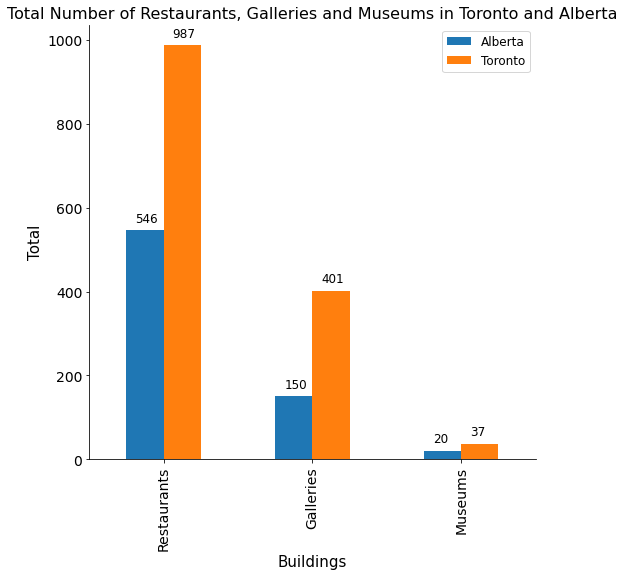

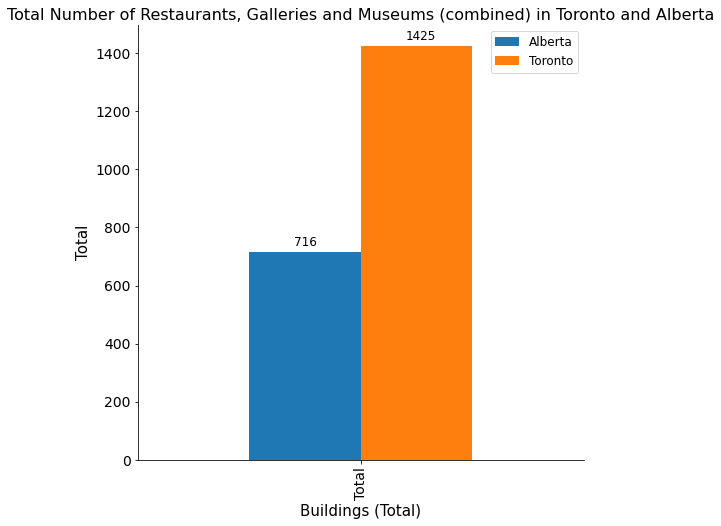

In [113]:
#Set bar chart

ax = df_total_compiled_f.loc[['Restaurants','Galleries','Museums']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)
ax_total = df_total_compiled_f.loc[['Total']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)

#Set bar chart title
ax.set_title('Total Number of Restaurants, Galleries and Museums in Toronto and Alberta',fontsize = 16)
ax_total.set_title('Total Number of Restaurants, Galleries and Museums (combined) in Toronto and Alberta',fontsize = 16)

# add labels to axes
ax.set_xlabel('Buildings', fontsize=15)
ax.set_ylabel('Total', fontsize=15)

ax_total.set_xlabel('Buildings (Total)', fontsize=15)
ax_total.set_ylabel('Total', fontsize=15)

#add legends
ax.legend(fontsize=12)
ax_total.legend(fontsize=12)

#Removing borders of left, right and top
borders = ["top","right"]

for b in borders:
    ax.spines[b].set_visible(False)
    ax_total.spines[b].set_visible(False)

    
# set individual bar labels in the bar chart
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.06, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')
for i in ax_total.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_total.text(i.get_x()+0.10, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')

#**5.2 Study on the Distributions of Restaurants, Galleries and Museums in both Locations.**
Here, the study on the distributions of restaurants, galleries and museums based on districts/ boroughs are aggregated in the form of dataframes for comprehension.



##**5.2.1 Alberta**

In [62]:
df_alberta_group_res = df_alberta_res.groupby('Neighborhood').count()

df_alberta_group_res["Venue"]= round(df_alberta_group_res["Venue"]/df_alberta_group_res["Venue"].sum(),3)*100

df_alberta_final_res = df_alberta_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_alberta_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_final_res

Distribution of Restaurants (%)
Neighborhood                                  
Airdrie                                    8.6
Calgary                                   33.7
Edmonton                                  31.2
Fort McMurray                              2.2
Leduc                                      1.5
Lethbridge                                 2.6
Medicine Hat                               7.0
Sherwood Park                             13.4

In [63]:
df_alberta_group_gal = df_alberta_gal.groupby('Neighborhood').count()

df_alberta_group_gal["Venue"]= round(df_alberta_group_gal["Venue"]/df_alberta_group_gal["Venue"].sum(),3)*100

df_alberta_final_gal = df_alberta_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_alberta_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_final_gal

Distribution of Galleries (%)
Neighborhood                                
Airdrie                                 10.6
Calgary                                 35.7
Edmonton                                30.4
Fort McMurray                            2.1
Leduc                                    1.4
Lethbridge                               2.3
Medicine Hat                             5.3
Sherwood Park                           12.2

In [58]:
df_alberta_group_meu = df_alberta_meu.groupby('Neighborhood').count()

df_alberta_group_meu["Venue"]= round(df_alberta_group_meu["Venue"]/df_alberta_group_meu["Venue"].sum(),3)*100

df_alberta_final_meu = df_alberta_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_alberta_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_final_meu

Distribution of Museums (%)
Neighborhood                             
Airdrie                              16.1
Calgary                              64.5
Edmonton                             12.9
Medicine Hat                          6.5

Now, we merge the distribution datas of Restaurants, Museums and Galleries of Toronto, Ontario into a single dataframe as compilation.

In [75]:
#To create dummy dataframe to extract Neighborhood data for reference
ddf =  df_alberta_final_res.reset_index()

# #To create dataframe for compilation
# df_dist_alberta = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
#                               index=[ddf['Neighborhood']])

# #Inserting relevant compiled data into the dataframe
# #df_dist_toronto['Neighborhood']=ddf['Neighborhood']
# df_dist_alberta["Distribution of Restaurants (%)"]=np.array(df_alberta_final_res["Distribution of Restaurants (%)"])
# df_dist_alberta["Distribution of Galleries (%)"]=np.array(df_alberta_final_gal["Distribution of Galleries (%)"])
# df_dist_alberta["Distribution of Museums (%)"]=np.array(df_alberta_final_meu["Distribution of Museums (%)"])

# #Displaying compiled datafram
# df_dist_alberta

In [70]:
df_dist_alberta = pd.merge(df_alberta_final_res,pd.merge(df_alberta_final_gal,df_alberta_final_meu,on = 'Neighborhood',how = 'outer'),on = 'Neighborhood',how = 'outer')
df_dist_alberta

Distribution of Restaurants (%)  ...  Distribution of Museums (%)
Neighborhood                                    ...                             
Airdrie                                    8.6  ...                         16.1
Calgary                                   33.7  ...                         64.5
Edmonton                                  31.2  ...                         12.9
Fort McMurray                              2.2  ...                          NaN
Leduc                                      1.5  ...                          NaN
Lethbridge                                 2.6  ...                          NaN
Medicine Hat                               7.0  ...                          6.5
Sherwood Park                             13.4  ...                          NaN

[8 rows x 3 columns]

Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in Toronto, Ontario.

(-1.1092875988829969,
 1.2042332972261667,
 -1.1048193454201556,
 1.2012060850803414)

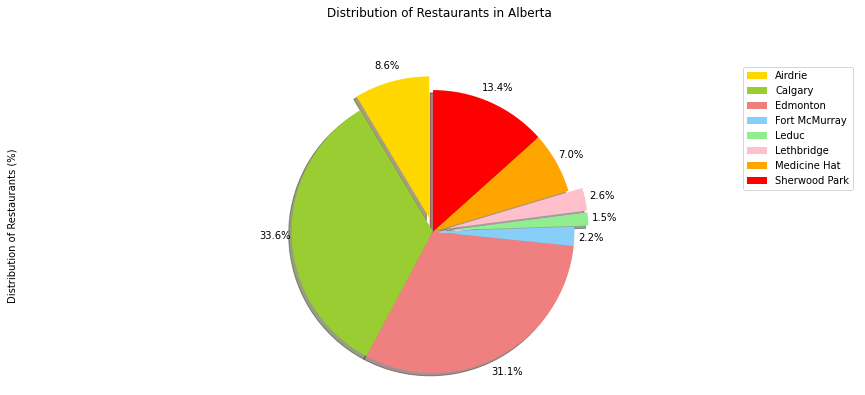

In [76]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_alberta.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in Alberta', y=1.12) 
plt.axis('equal')


(-1.1212979852078504,
 1.1718972668484595,
 -1.1151663485672711,
 1.1997288142837037)

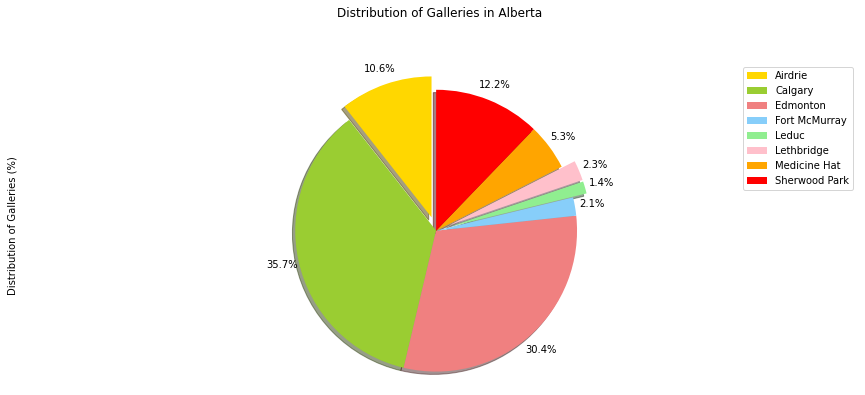

In [77]:
df_dist_alberta.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in Alberta', y=1.12) 
plt.axis('equal')

(-1.1086326247626686,
 1.1153030703154103,
 -1.1171824423019645,
 1.1924627615726209)

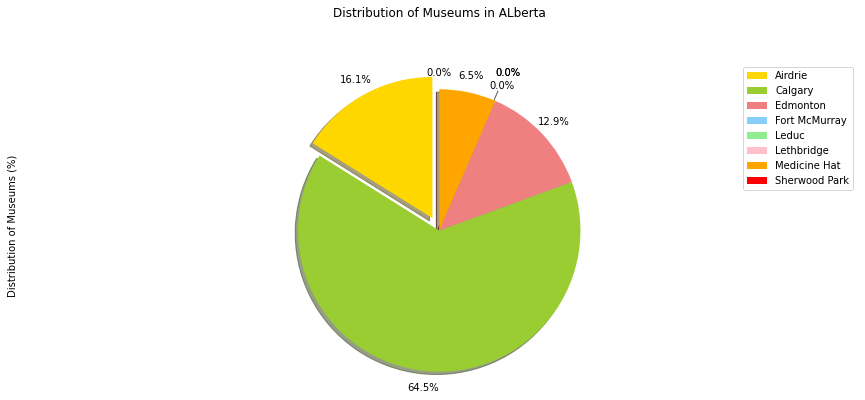

In [79]:
df_dist_alberta.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in ALberta', y=1.12) 
plt.axis('equal')

##**5.2.2 Toronto**


In [80]:
df_toronto_group_res = df_toronto_res.groupby('Neighborhood').count()

df_toronto_group_res["Venue"]= round(df_toronto_group_res["Venue"]/df_toronto_group_res["Venue"].sum(),3)*100

df_toronto_final_res = df_toronto_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_toronto_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Restaurants (%)
Neighborhood                                     
Downtown Toronto                             22.7
East Toronto                                  4.6
East York                                    10.9
Etobicoke                                     8.4
North York                                   28.6
Scarborough                                  15.5
West Toronto                                  4.2
York                                          5.0

In [81]:
df_toronto_group_gal = df_toronto_gal.groupby('Neighborhood').count()

df_toronto_group_gal["Venue"]= round(df_toronto_group_gal["Venue"]/df_toronto_group_gal["Venue"].sum(),3)*100

df_toronto_final_gal = df_toronto_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_toronto_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Galleries (%)
Neighborhood                                   
Downtown Toronto                           22.0
East Toronto                                5.6
East York                                  10.1
Etobicoke                                   6.2
North York                                 32.7
Scarborough                                15.1
West Toronto                                4.6
York                                        3.8

In [82]:
df_toronto_group_meu = df_toronto_meu.groupby('Neighborhood').count()

df_toronto_group_meu["Venue"]= round(df_toronto_group_meu["Venue"]/df_toronto_group_meu["Venue"].sum(),3)*100

df_toronto_final_meu = df_toronto_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_toronto_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Museums (%)
Neighborhood                                 
Downtown Toronto                         19.0
East Toronto                              3.1
East York                                11.3
Etobicoke                                13.8
North York                               26.7
Scarborough                              17.9
West Toronto                              1.0
York                                      7.2

Now, we merge the distribution datas of Restaurants, Museums and Galleries of Toronto, Ontario into a single dataframe as compilation.


In [83]:
#To create dummy dataframe to extract Neighborhood data for reference
ddf =  df_toronto_final_meu.reset_index()

#To create dataframe for compilation
df_dist_toronto = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
df_dist_toronto["Distribution of Restaurants (%)"]=np.array(df_toronto_final_res["Distribution of Restaurants (%)"])
df_dist_toronto["Distribution of Galleries (%)"]=np.array(df_toronto_final_gal["Distribution of Galleries (%)"])
df_dist_toronto["Distribution of Museums (%)"]=np.array(df_toronto_final_meu["Distribution of Museums (%)"])

#Displaying compiled datafram
df_dist_toronto

Distribution of Restaurants (%)  ...  Distribution of Museums (%)
Neighborhood                                       ...                             
Downtown Toronto                             22.7  ...                         19.0
East Toronto                                  4.6  ...                          3.1
East York                                    10.9  ...                         11.3
Etobicoke                                     8.4  ...                         13.8
North York                                   28.6  ...                         26.7
Scarborough                                  15.5  ...                         17.9
West Toronto                                  4.2  ...                          1.0
York                                          5.0  ...                          7.2

[8 rows x 3 columns]

Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in Toronto, Ontario.


(-1.1623878636071012,
 1.1945127432308218,
 -1.1946823563265254,
 1.1836922481221408)

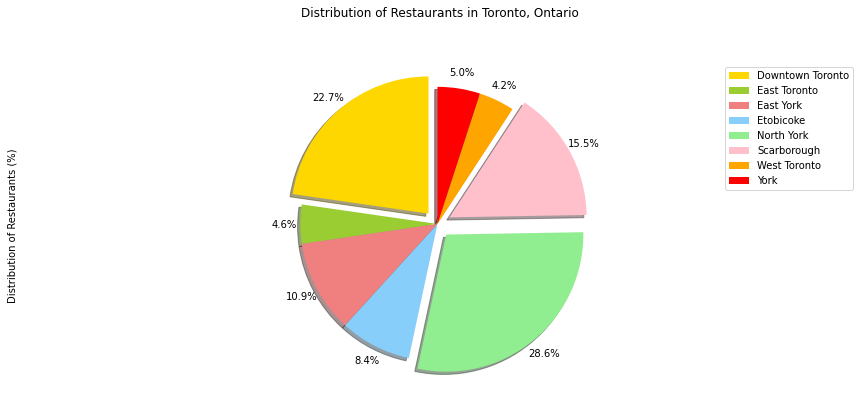

In [84]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_toronto.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in Toronto, Ontario', y=1.12) 
plt.axis('equal')

(-1.151984164637419,
 1.185899620042516,
 -1.2024798062598903,
 1.1856465165939587)

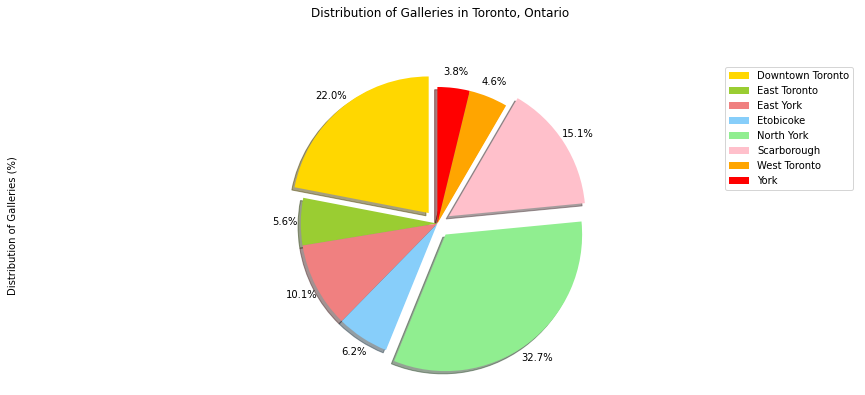

In [85]:
df_dist_toronto.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in Toronto, Ontario', y=1.12) 
plt.axis('equal')

(-1.1107190701557677,
 1.2039346936032393,
 -1.1964772153006906,
 1.1912406899031862)

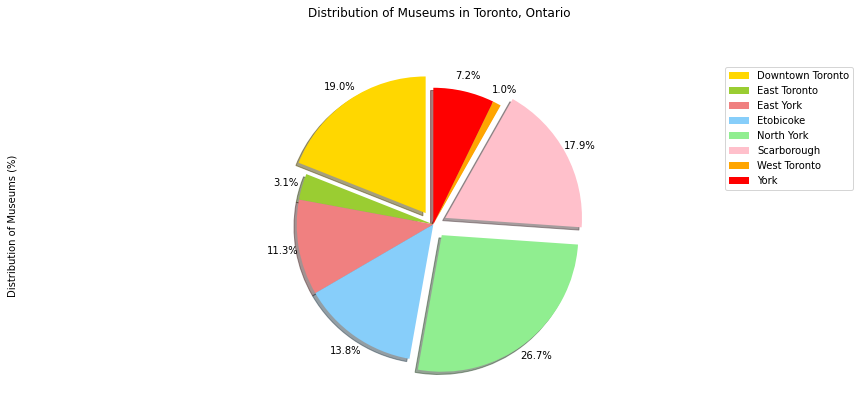

In [86]:
df_dist_toronto.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in Toronto, Ontario', y=1.12) 
plt.axis('equal')

##**5.3 Study on the Total Number of Restaurants, Galleries and Museums in both Location (Borough)**


###**5.3.1 Alberta**


In [110]:
#To only display unique datasets based on characterising restaurant names into unique manner
df_alberta_quantity_res = df_alberta_res.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_alberta_quantity_group_res = df_alberta_quantity_res.groupby('Neighborhood').count()
df_alberta_quantity_group_final_res = df_alberta_quantity_group_res.rename(columns={"Venue": "Total Number of Restaurants"})
df_alberta_quantity_group_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_quantity_group_final_res

Total Number of Restaurants
Neighborhood                              
Airdrie                                 50
Calgary                                184
Edmonton                               177
Fort McMurray                           11
Leduc                                    9
Lethbridge                              13
Medicine Hat                            33
Sherwood Park                           69

In [99]:
#To only display unique datasets based on characterising gallery names into unique manner
df_alberta_quantity_gal = df_alberta_gal.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_alberta_quantity_group_gal = df_alberta_quantity_gal.groupby('Neighborhood').count()
df_alberta_quantity_group_final_gal = df_alberta_quantity_group_gal.rename(columns={"Venue": "Total Number of Galleries"})
df_alberta_quantity_group_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_quantity_group_final_gal

Total Number of Galleries
Neighborhood                            
Airdrie                               18
Calgary                               64
Edmonton                              44
Fort McMurray                          2
Leduc                                  1
Lethbridge                             2
Medicine Hat                           7
Sherwood Park                         12

In [100]:
#To only display unique datasets based on characterising museum names into unique manner
df_alberta_quantity_meu = df_alberta_meu.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_alberta_quantity_group_meu = df_alberta_quantity_meu.groupby('Neighborhood').count()
df_alberta_quantity_group_final_meu = df_alberta_quantity_group_meu.rename(columns={"Venue": "Total Number of Museums"})
df_alberta_quantity_group_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_alberta_quantity_group_final_meu

Total Number of Museums
Neighborhood                         
Airdrie                             4
Calgary                            15
Edmonton                            1

In [101]:
#To create dataframe for compilation
df_totals_alberta = pd.DataFrame(columns=['Total Number of Restaurants','Total Number of Galleries','Total Number of Museums'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
# df_totals_alberta["Total Number of Restaurants"]=np.array(df_alberta_quantity_group_final_res["Total Number of Restaurants"])
# df_totals_alberta["Total Number of Galleries"]=np.array(df_alberta_quantity_group_final_gal["Total Number of Galleries"])
# df_totals_alberta["Total Number of Museums"]=np.array(df_alberta_quantity_group_final_meu["Total Number of Museums"])

#Displaying compiled datafram
df_totals_alberta

df_totals_alberta = pd.merge(df_alberta_quantity_group_final_res,pd.merge(df_alberta_quantity_group_final_gal,df_alberta_quantity_group_final_meu,on = 'Neighborhood',how = 'outer'),on = 'Neighborhood',how = 'outer')
df_totals_alberta


Total Number of Restaurants  ...  Total Number of Museums
Neighborhood                                ...                         
Airdrie                                 50  ...                      4.0
Calgary                                184  ...                     15.0
Edmonton                               177  ...                      1.0
Fort McMurray                           11  ...                      NaN
Leduc                                    9  ...                      NaN
Lethbridge                              13  ...                      NaN
Medicine Hat                            33  ...                      NaN
Sherwood Park                           69  ...                      NaN

[8 rows x 3 columns]

##**5.4 Study on the Total Number of Restaurants, Galleries and Museums in both Location (Borough)**

###**5.4.1.Toronto**

In [111]:
#To only display unique datasets based on characterising restaurant names into unique manner
df_toronto_quantity_res = df_toronto_res.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_toronto_quantity_group_res = df_toronto_quantity_res.groupby('Neighborhood').count()
df_toronto_quantity_group_final_res = df_toronto_quantity_group_res.rename(columns={"Venue": "Total Number of Restaurants"})
df_toronto_quantity_group_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_toronto_quantity_group_final_res

Total Number of Restaurants
Neighborhood                                 
Downtown Toronto                          227
East Toronto                               43
East York                                 112
Etobicoke                                  86
North York                                304
Scarborough                               137
West Toronto                               37
York                                       41

In [103]:
#To only display unique datasets based on characterising gallery names into unique manner
df_toronto_quantity_gal = df_toronto_gal.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_toronto_quantity_group_gal = df_toronto_quantity_gal.groupby('Neighborhood').count()
df_toronto_quantity_group_final_gal = df_toronto_quantity_group_gal.rename(columns={"Venue": "Total Number of Galleries"})
df_toronto_quantity_group_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Total Number of Galleries
Neighborhood                               
Downtown Toronto                         84
East Toronto                             22
East York                                28
Etobicoke                                17
North York                              151
Scarborough                              58
West Toronto                             24
York                                     17

In [104]:
#To only display unique datasets based on characterising museum names into unique manner
df_toronto_quantity_meu = df_toronto_meu.drop_duplicates(subset = 'Venue', keep='first')

#To group neighborhoods 
df_toronto_quantity_group_meu = df_toronto_quantity_meu.groupby('Neighborhood').count()
df_toronto_quantity_group_final_meu = df_toronto_quantity_group_meu.rename(columns={"Venue": "Total Number of Museums"})
df_toronto_quantity_group_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Total Number of Museums
Neighborhood                             
Downtown Toronto                        6
East Toronto                            1
East York                               3
Etobicoke                               4
North York                             14
Scarborough                             5
West Toronto                            1
York                                    3

In [105]:
#To create dataframe for compilation
df_totals_toronto = pd.DataFrame(columns=['Total Number of Restaurants','Total Number of Galleries','Total Number of Museums'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
df_totals_toronto["Total Number of Restaurants"]=np.array(df_toronto_quantity_group_final_res["Total Number of Restaurants"])
df_totals_toronto["Total Number of Galleries"]=np.array(df_toronto_quantity_group_final_gal["Total Number of Galleries"])
df_totals_toronto["Total Number of Museums"]=np.array(df_toronto_quantity_group_final_meu["Total Number of Museums"])

#Displaying compiled datafram
df_totals_toronto

Total Number of Restaurants  ...  Total Number of Museums
Neighborhood                                   ...                         
Downtown Toronto                          227  ...                        6
East Toronto                               43  ...                        1
East York                                 112  ...                        3
Etobicoke                                  86  ...                        4
North York                                304  ...                       14
Scarborough                               137  ...                        5
West Toronto                               37  ...                        1
York                                       41  ...                        3

[8 rows x 3 columns]

#**6.0 Results and Discussion**
The analyzed data obtained via exploratory data analysis in section 5.0 to 5.3 has given us the findings that the total numbers of restaurants, galleries and museums in Toronto significantly outweighs Alberta,(though we have considered only the city of Toronto compared to the province of Alberta), as visualized via bar charts in section 5.0.

By accessing the total number and distributions of restaurants, galleries and museums of both location of interest in section 5.1 and 5.2, we can see that the data trends of each distinctive boroughs for restaurants, galleries and museums are distincitve for Alberta, but equally distributed for. The boroughs of Calgary, Edmonton and Airdrie are the top 3 boroughs with high numbers of restaurants, galleries and museums. Whereas, the notable Boroughs of Toronto with fairly similar distributions and total numbers of restaurants, galleries and museums are Downtown Toronto	, North York and Scarborough. Hence, these boroughs in both location of interest with higher numbers of restaurants, galleries and museums could be regarded as the respective tourist spots.




#**7.0 Conclusion**
From our findings, it has come to a conclusion where Toronto has significantly higher number of restaurants, galleries and museums than that of the Alberta based on the study scope. Therefore, we can say that Toronto has a higher potentiality than Alberta as destination with higher welcoming rate in tourism.